In [1]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import numpy as np
import pandas as pd
import seaborn as sns

os.chdir("../")

In [2]:
output = []
for country, years in [
    ("France", [2002, 2007, 2012, 2017, 2022]),
    ("Chile", [2013, 2017, 2021])
]:
    for metric in ["ep", "ec"]:
        aggregation = "department_id" if country == "France" else "region_id"
        for year in years:
            tmp = pd.read_csv(f"data_robustness/{country}/candidates_{year}.csv")
            tmp_cum = pd.read_csv(f"data_robustness/{country}/cumulative_{year}.csv")
            tmp_all = tmp[tmp["N_candidates"] == tmp["N_candidates"].max()]
            for N_candidates, frag in tmp.groupby("N_candidates"):
                aa = pd.merge(frag, tmp_all, on=aggregation)
                bb = tmp_cum[tmp_cum["N_candidates"] == N_candidates]["cumulative"].values[0]
                corr, pvalue = pearsonr(aa[f"{metric}_x"], aa[f"{metric}_y"])

                output.append({
                    "pearson": corr,
                    "cumulative": bb,
                    "country": country,
                    "N_candidates": N_candidates,
                    "year": year,
                    "metric": metric
                })

df = pd.DataFrame(output)
df.head()

,pearson,cumulative,country,N_candidates,year,metric
0,0.766287,0.365961,France,2,2002,ep
1,0.875667,0.524438,France,3,2002,ep
2,0.907116,0.593905,France,4,2002,ep
3,0.927752,0.652121,France,5,2002,ep
4,0.950109,0.706025,France,6,2002,ep


C:\Users\cnava\AppData\Local\Temp\ipykernel_34616\1784838586.py:7: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
C:\Users\cnava\AppData\Local\Temp\ipykernel_34616\1784838586.py:18: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


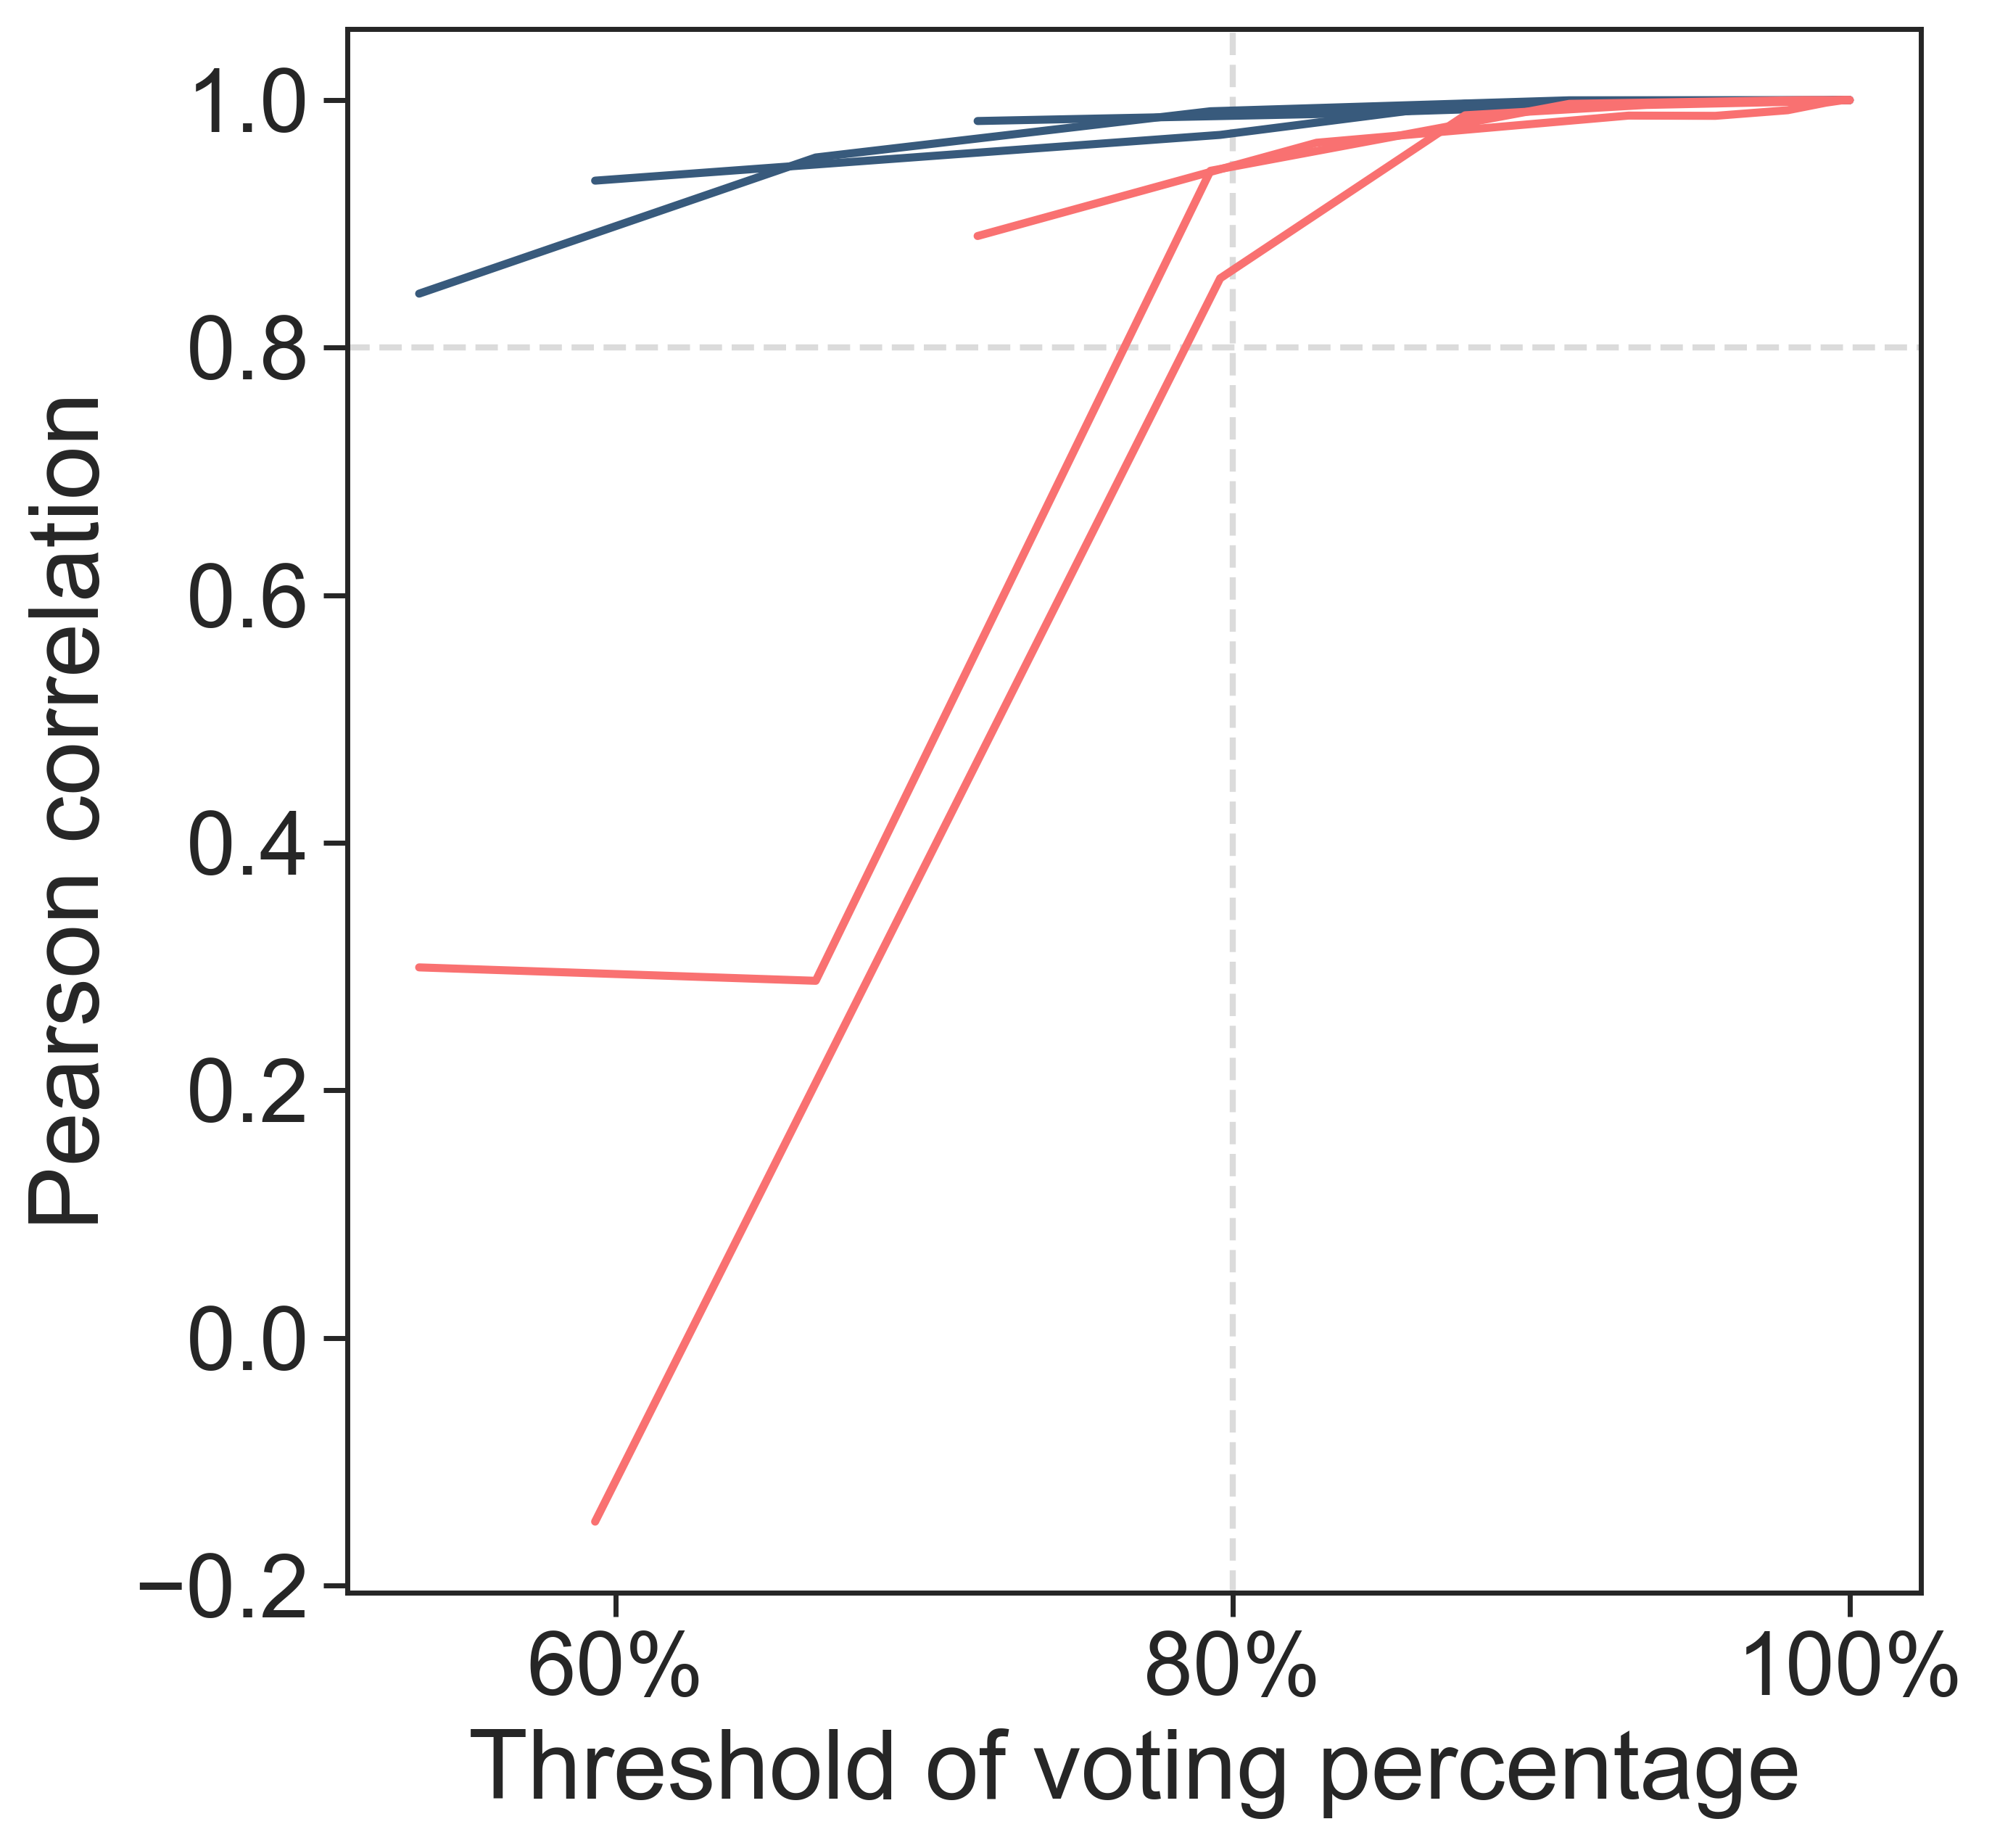

In [3]:
sns.set(font_scale=2, style="ticks")

fig, ax = plt.subplots(figsize=(7, 7), dpi=400)

country = "Chile"

sns.lineplot(
    x="cumulative", 
    y="pearson", 
    lw=2, 
    # legend=False,
    hue="year", 
    palette=sns.color_palette(["#385A7C"]),
    data=df[(df["N_candidates"]>=2) & (df["country"] == country) & (df["metric"] == "ep")],
    # zorder=2
)

sns.lineplot(
    x="cumulative", 
    y="pearson", 
    lw=2, 
    # legend=False,
    hue="year", 
    palette=sns.color_palette(["#F97171"]),
    data=df[(df["N_candidates"]>=2) & (df["country"] == country) & (df["metric"] == "ec")],
    # zorder=2
)

ax.set_ylabel("Pearson correlation")
ax.set_xlabel("Threshold of voting percentage")
ax.axhline(y=0.8, color="#DBDBDB", ls="--", zorder=1)
ax.axvline(x=0.8, color="#DBDBDB", ls="--", zorder=1)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

leg = ax.legend(title="Year", frameon=False)
leg.remove()
# for line in leg.get_lines():
#     line.set_linewidth(7.0)

In [8]:
import sys
sys.path.append("C:/Users/cnava/Repos/PolaPy")

from polapy.competitiveness import laackso_taagepera

In [9]:
output = []
for country, years in [
    ("France", [2002, 2007, 2012, 2017, 2022]),
    ("Chile", [2013, 2017, 2021])
]:
    for year in years:
        frag = pd.read_csv(
            f"data_output/{country}/{year}_first_round.csv.gz",
            compression="gzip"
        )

        if "flag_candidates" in list(frag):
            frag = frag.query("flag_candidates == 1")

        data = frag.groupby("candidate").agg({"value": "sum"}).reset_index()
        data["share"] = data["value"] / data["value"].sum()

        output.append({
            "N_candidates": np.ceil(laackso_taagepera(data)),
            "country": country,
            "year": year
        })

df_eff = pd.DataFrame(output)
df_eff

,N_candidates,country,year
0,9.0,France,2002
1,5.0,France,2007
2,5.0,France,2012
3,6.0,France,2017
4,6.0,France,2022
5,4.0,Chile,2013
6,5.0,Chile,2017
7,6.0,Chile,2021


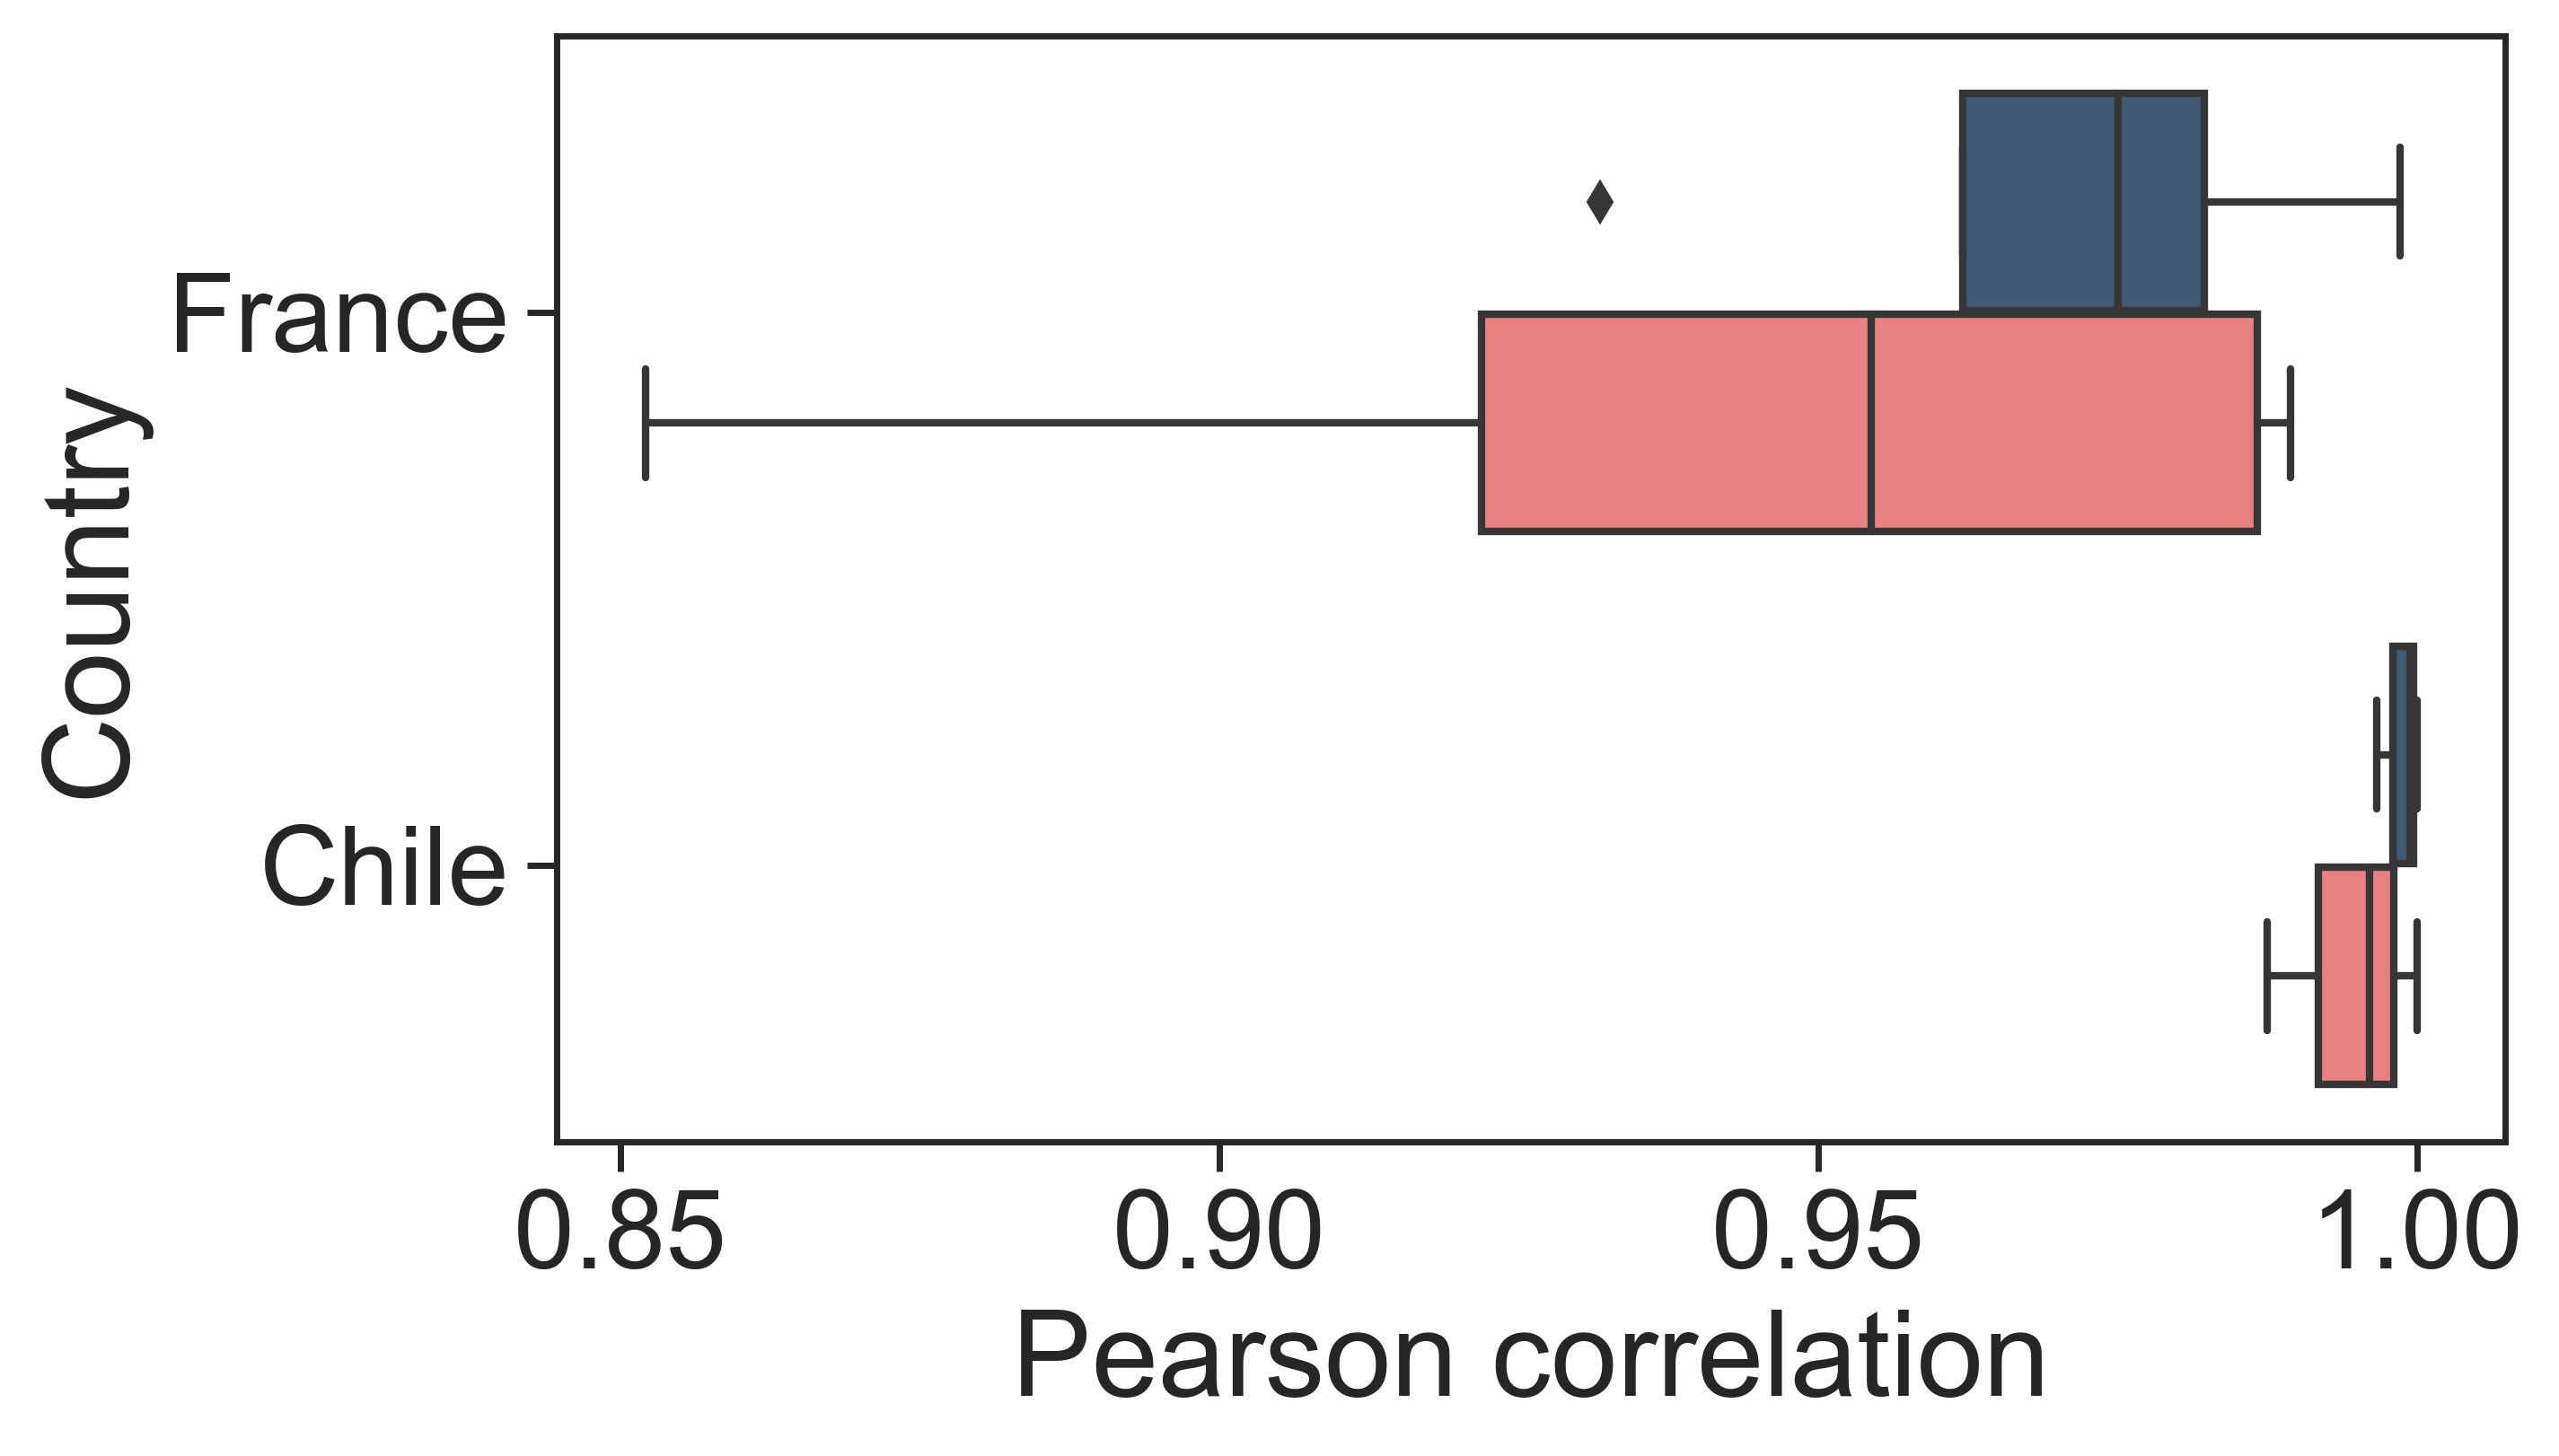

In [20]:
dt = pd.merge(df, df_eff, on=["country", "N_candidates", "year"])

sns.set(font_scale=2, style="ticks")

fig, ax = plt.subplots(figsize=(7, 4), dpi=400)

sns.boxplot(x="pearson", y="country", hue="metric", palette=["#385A7C", "#F97171"], data=dt)
# sns.stripplot(x="pearson", y="country", hue="metric", data=dt, size=10, color=".3")

ax.set_xlabel("Pearson correlation")
ax.set_ylabel("Country")
leg = ax.legend()
leg.remove()

In [7]:
df.query("N_candidates == 6 & year == 2022")

,pearson,cumulative,country,N_candidates,year,metric
49,0.975070,0.893141,France,6,2022,ep
105,0.921898,0.893141,France,6,2022,ec
